In [36]:
import ConfigParser
import os

from LaFabrique import communication as comm
from LaFabrique import util_CMB
from LaFabrique import scanning_strategy
from LaFabrique import noise

import healpy as hp
import matplotlib.pyplot as pl

In [43]:
#### SET UP YOUR ENVIRONMENT
## Load the environment (paths, etc)
Config = ConfigParser.ConfigParser()
Config.read('test/setup_env_test.ini')
environment = util_CMB.normalise_env_parser(
        Config._sections['Environment'])

## Initialise paths
environment.outpath_noise = os.path.join(
    environment.out_path, 'noise')
environment.outpath_masks = os.path.join(
    environment.out_path, 'masks')
environment.outpath_foregrounds = os.path.join(
    environment.out_path, 'foregrounds')

## Create folders if necessary
if comm.rank == 0:
    ## Create root folder
    if not os.path.exists(environment.out_path):
        os.makedirs(environment.out_path)

    ## Create folders for noise and masks
    if not os.path.exists(environment.outpath_noise):
        os.makedirs(environment.outpath_noise)
    if not os.path.exists(environment.outpath_masks):
        os.makedirs(environment.outpath_masks)
    if not os.path.exists(environment.outpath_foregrounds):
        os.makedirs(environment.outpath_foregrounds)

In [44]:
#### SIMULATE A SCAN
## Keep calm and relaunch twice if you get errors (from the compilation of C. Weave is quite picky...)
scanning_strategy.generate_scans('test/setup_scanning_test.ini', environment)

## You should get your masks here
!ls test/test/masks

IQU_nside64_test_weights_freq150_HF.fits
IQU_nside64_test_weights_freq150_MF.fits
IQU_nside64_test_weights_freq220_HF.fits
IQU_nside64_test_weights_freq220_UHF.fits
IQU_nside64_test_weights_freq270_UHF.fits
IQU_nside64_test_weights_freq27_LF.fits
IQU_nside64_test_weights_freq39_LF.fits
IQU_nside64_test_weights_freq90_MF.fits
IQU_nside64_test_weights_freq_combined.fits
setup_scanning.ini
test.hdf5


NSIDE = 64
ORDERING = RING in fits file
INDXSCHM = EXPLICIT
38.4945419593 141.505458041 -51.5054580407 51.5054580407
The interval between parallels is 10 deg 0.00'.
The interval between meridians is 6 deg 0.00'.


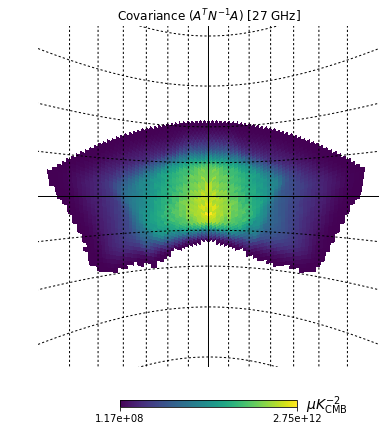

In [50]:
## Let's have a look at the polarised covariance matrix at 27 GHz (that is the inverse noise map in polarisation)
data_27GHz = hp.read_map(os.path.join(environment.outpath_masks, 'IQU_nside64_test_weights_freq27_LF.fits'))
hp.gnomview(
    data_27GHz, rot=[0,-57.5], xsize=900,reso=6.8, cmap=pl.cm.viridis, 
    title='Covariance ($A^T N^{-1} A$) [27 GHz]', notext=True, unit='$\mu K_{\\rm CMB}^{-2}$')
hp.graticule(dpar = 1.)
pl.show()

In [46]:
#### SIMULATE A NOISE MAP FROM THE PREVIOUS SCAN
noise.generate_noise_sims('test/setup_instrument_test.ini', comm=None, env=environment)

NSIDE = 64
ORDERING = RING in fits file
INDXSCHM = EXPLICIT
NSIDE = 64
ORDERING = RING in fits file
INDXSCHM = EXPLICIT
NSIDE = 64
ORDERING = RING in fits file
INDXSCHM = EXPLICIT
NSIDE = 64
ORDERING = RING in fits file
INDXSCHM = EXPLICIT
NSIDE = 64
ORDERING = RING in fits file
INDXSCHM = EXPLICIT
NSIDE = 64
ORDERING = RING in fits file
INDXSCHM = EXPLICIT
NSIDE = 64
ORDERING = RING in fits file
INDXSCHM = EXPLICIT
NSIDE = 64
ORDERING = RING in fits file
INDXSCHM = EXPLICIT
NSIDE = 64
ORDERING = RING in fits file
INDXSCHM = EXPLICIT


In [47]:
## You should get your 800 noise sims here (100 MC for the 8 frequency channels)
!ls test/test/noise/*.fits | wc 

     800     800   54300


NSIDE = 64
ORDERING = RING in fits file
INDXSCHM = EXPLICIT
38.4945419593 141.505458041 -51.5054580407 51.5054580407
The interval between parallels is 10 deg 0.00'.
The interval between meridians is 6 deg 0.00'.


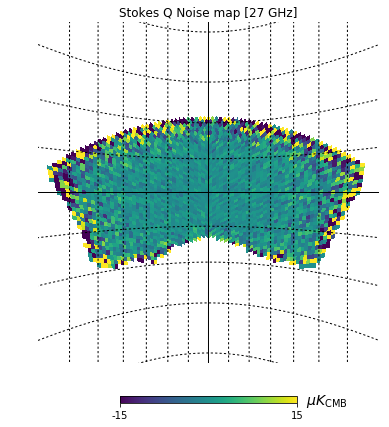

In [48]:
## Let's have a look at one of the Stokes Q noise realisation
data_27GHz_noise = hp.read_map(
    os.path.join(environment.outpath_noise, 'IQU_nside64_test_freq27_LF_white_noise_sim000.fits'), 1)
hp.gnomview(
    data_27GHz_noise, rot=[0,-57.5], xsize=900,reso=6.8, cmap=pl.cm.viridis,
    min=-15, max=15,
    title='Stokes Q Noise map [27 GHz]', notext=True, unit='$\mu K_{\\rm CMB}$')
hp.graticule(dpar = 1.)
pl.show()

In [ ]:
## Et voilà! Now you can do the same with different map resolutions, frequency channels, noise levels, etc...